In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Research for INK


In [10]:
prices_day__2 = pd.read_csv("round-1-island-data-bottle\prices_round_1_day_-2.csv",sep = ";")
prices_day__2 = prices_day__2[prices_day__2["product"] == "SQUID_INK"]
prices_day__1 = pd.read_csv("round-1-island-data-bottle\prices_round_1_day_-1.csv",sep = ";")
prices_day__1 = prices_day__1[prices_day__1["product"] == "SQUID_INK"]
prices_day_0 = pd.read_csv("round-1-island-data-bottle\prices_round_1_day_0.csv",sep = ";")
prices_day_0 = prices_day_0[prices_day_0["product"] == "SQUID_INK"]

In [ ]:

all_prices = pd.concat([prices_day__2, prices_day__1, prices_day_0])

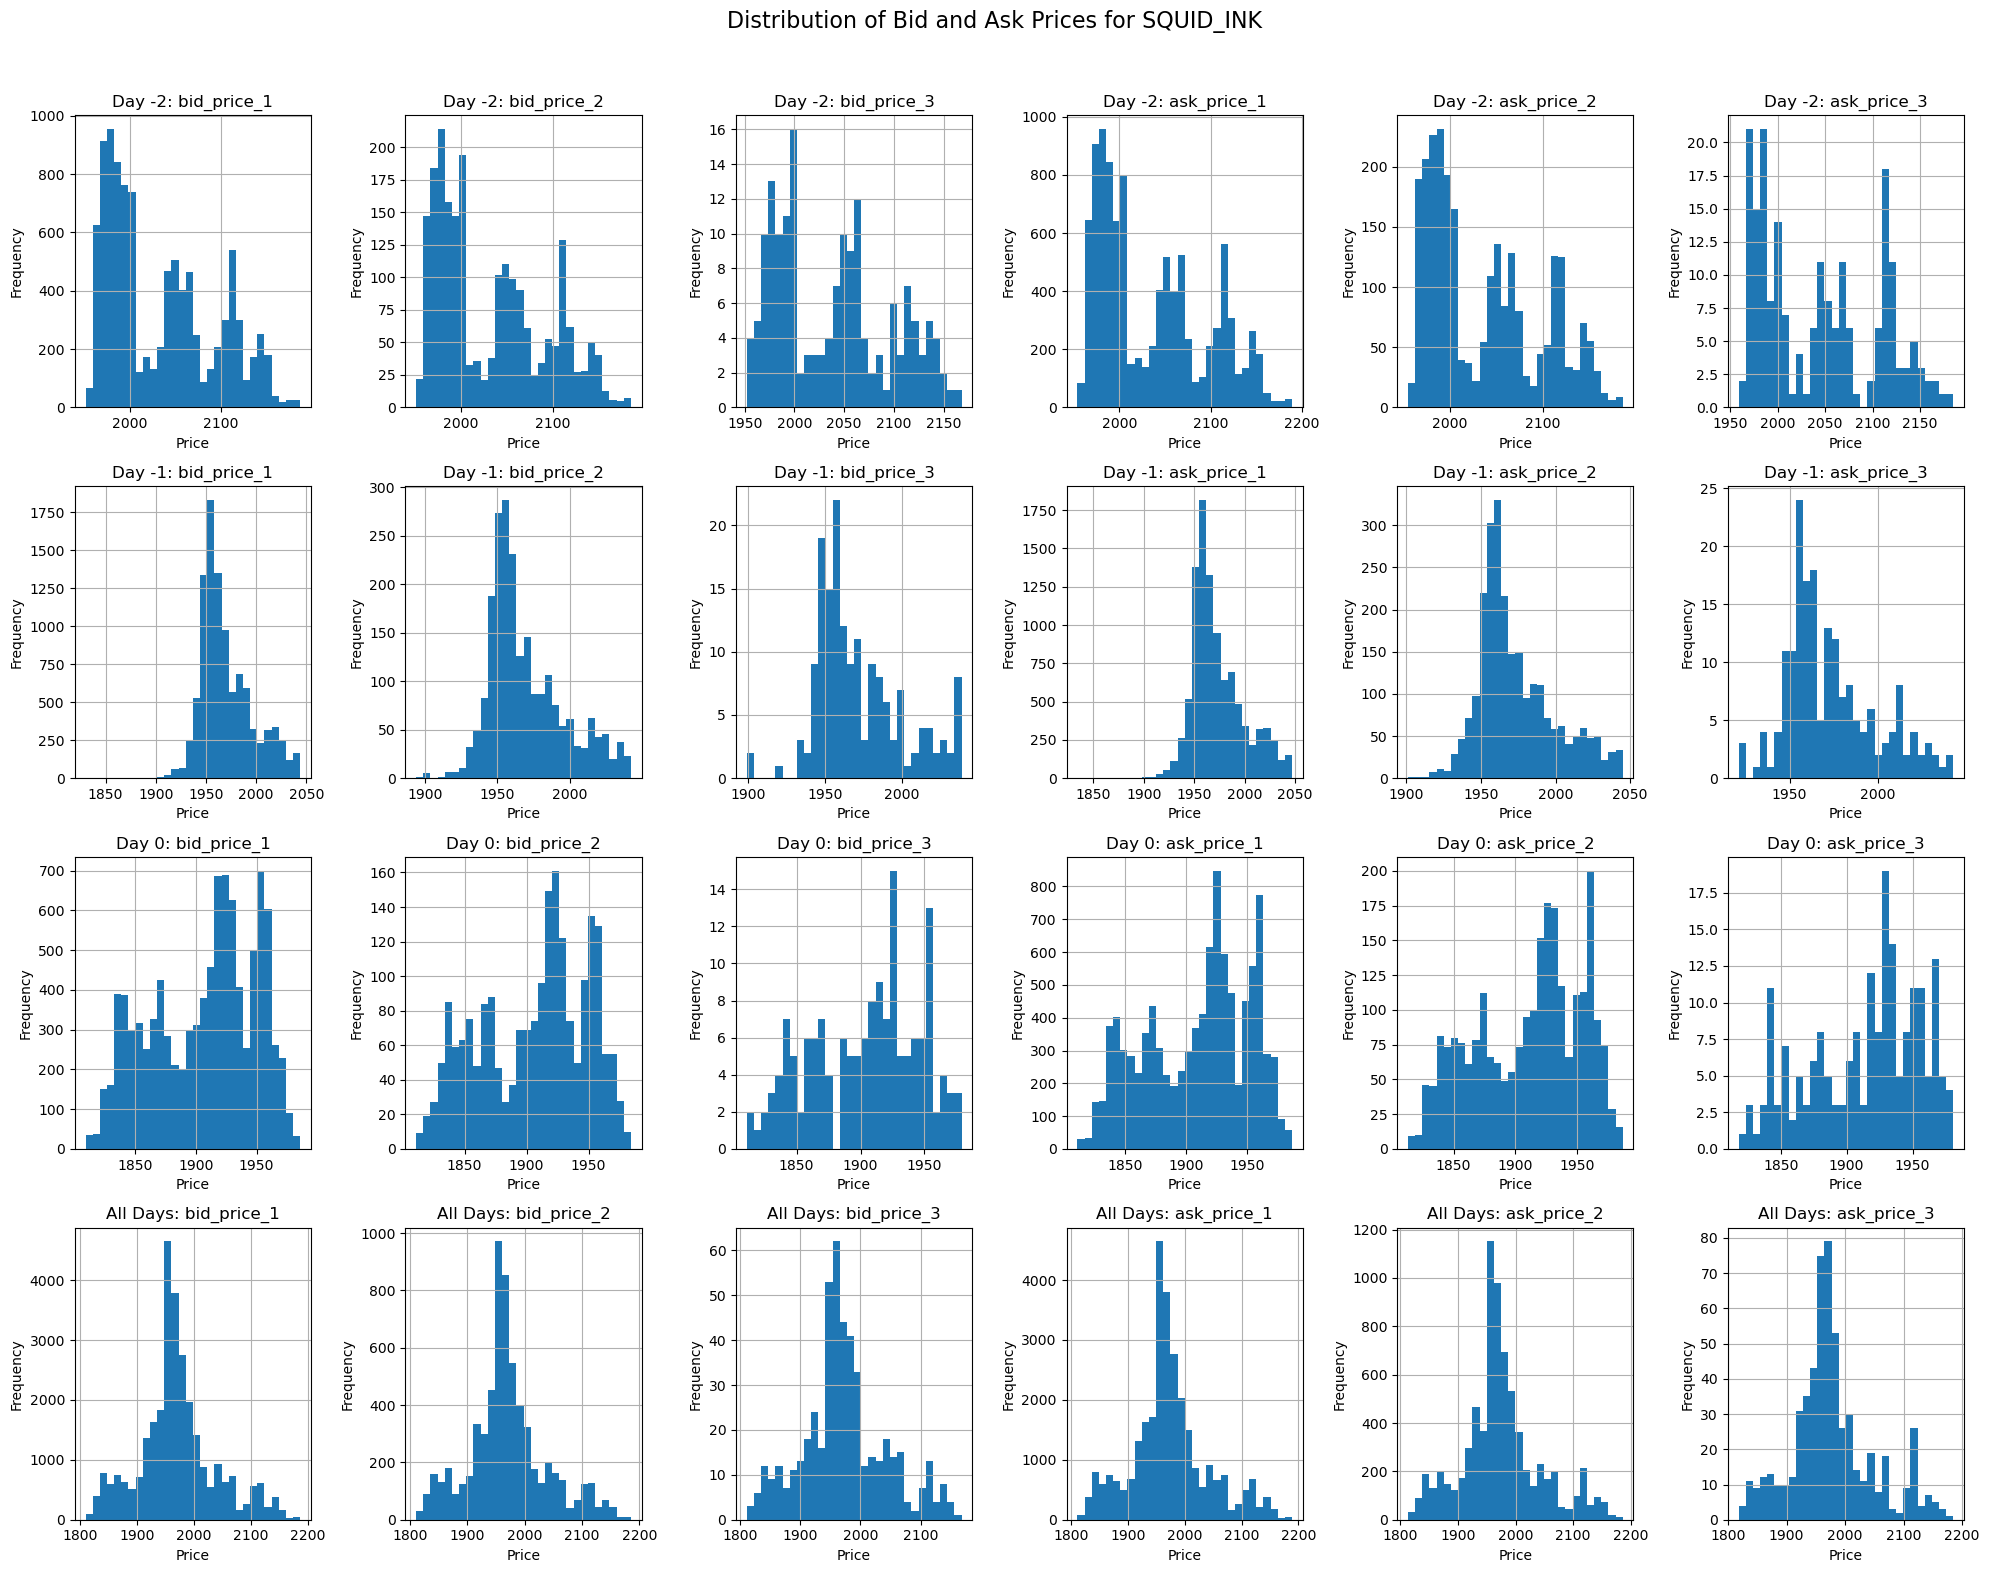

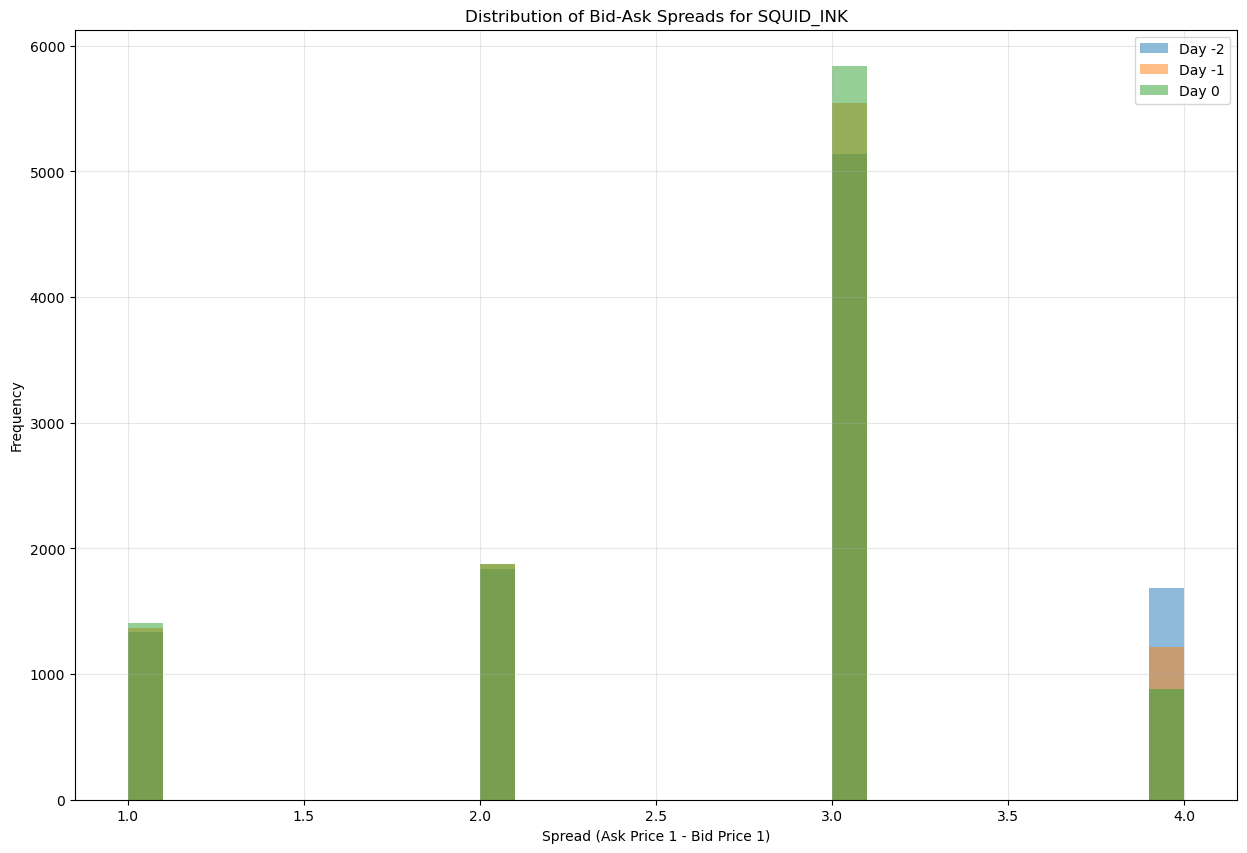

In [ ]:

# Define the columns to plot
bid_columns = ['bid_price_1', 'bid_price_2', 'bid_price_3']
ask_columns = ['ask_price_1', 'ask_price_2', 'ask_price_3']
all_columns = bid_columns + ask_columns

# Create a 4x6 grid of subplots (4 datasets x 6 price columns)
fig, axes = plt.subplots(4, 6, figsize=(20, 16))
fig.suptitle('Distribution of Bid and Ask Prices for SQUID_INK', fontsize=16)

# Plot for day -2
for i, col in enumerate(all_columns):
    if col in prices_day__2.columns:
        prices_day__2[col].dropna().hist(ax=axes[0, i], bins=30)
        axes[0, i].set_title(f'Day -2: {col}')
        axes[0, i].set_xlabel('Price')
        axes[0, i].set_ylabel('Frequency')

# Plot for day -1
for i, col in enumerate(all_columns):
    if col in prices_day__1.columns:
        prices_day__1[col].dropna().hist(ax=axes[1, i], bins=30)
        axes[1, i].set_title(f'Day -1: {col}')
        axes[1, i].set_xlabel('Price')
        axes[1, i].set_ylabel('Frequency')

# Plot for day 0
for i, col in enumerate(all_columns):
    if col in prices_day_0.columns:
        prices_day_0[col].dropna().hist(ax=axes[2, i], bins=30)
        axes[2, i].set_title(f'Day 0: {col}')
        axes[2, i].set_xlabel('Price')
        axes[2, i].set_ylabel('Frequency')

# Plot for all days combined
for i, col in enumerate(all_columns):
    if col in all_prices.columns:
        all_prices[col].dropna().hist(ax=axes[3, i], bins=30)
        axes[3, i].set_title(f'All Days: {col}')
        axes[3, i].set_xlabel('Price')
        axes[3, i].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Create a second figure to compare bid-ask spreads
plt.figure(figsize=(15, 10))

# Calculate best bid-ask spread for each day
for df, day in [(prices_day__2, '-2'), (prices_day__1, '-1'), (prices_day_0, '0')]:
    best_bid = df['bid_price_1'].dropna()
    best_ask = df['ask_price_1'].dropna()
    
    # Only calculate spread where both bid and ask exist
    valid_indices = best_bid.index.intersection(best_ask.index)
    if len(valid_indices) > 0:
        spread = df.loc[valid_indices, 'ask_price_1'] - df.loc[valid_indices, 'bid_price_1']
        plt.hist(spread, bins=30, alpha=0.5, label=f'Day {day}')

plt.title('Distribution of Bid-Ask Spreads for SQUID_INK')
plt.xlabel('Spread (Ask Price 1 - Bid Price 1)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


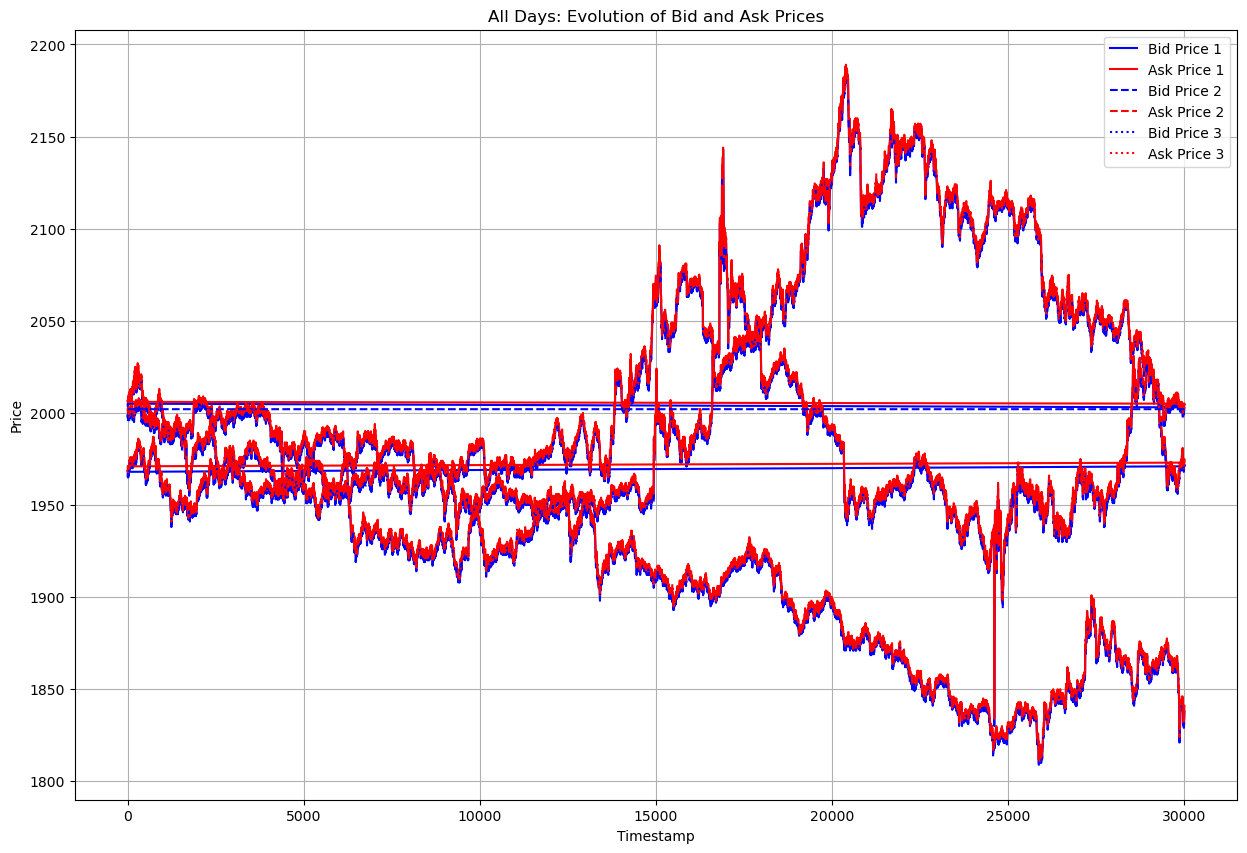

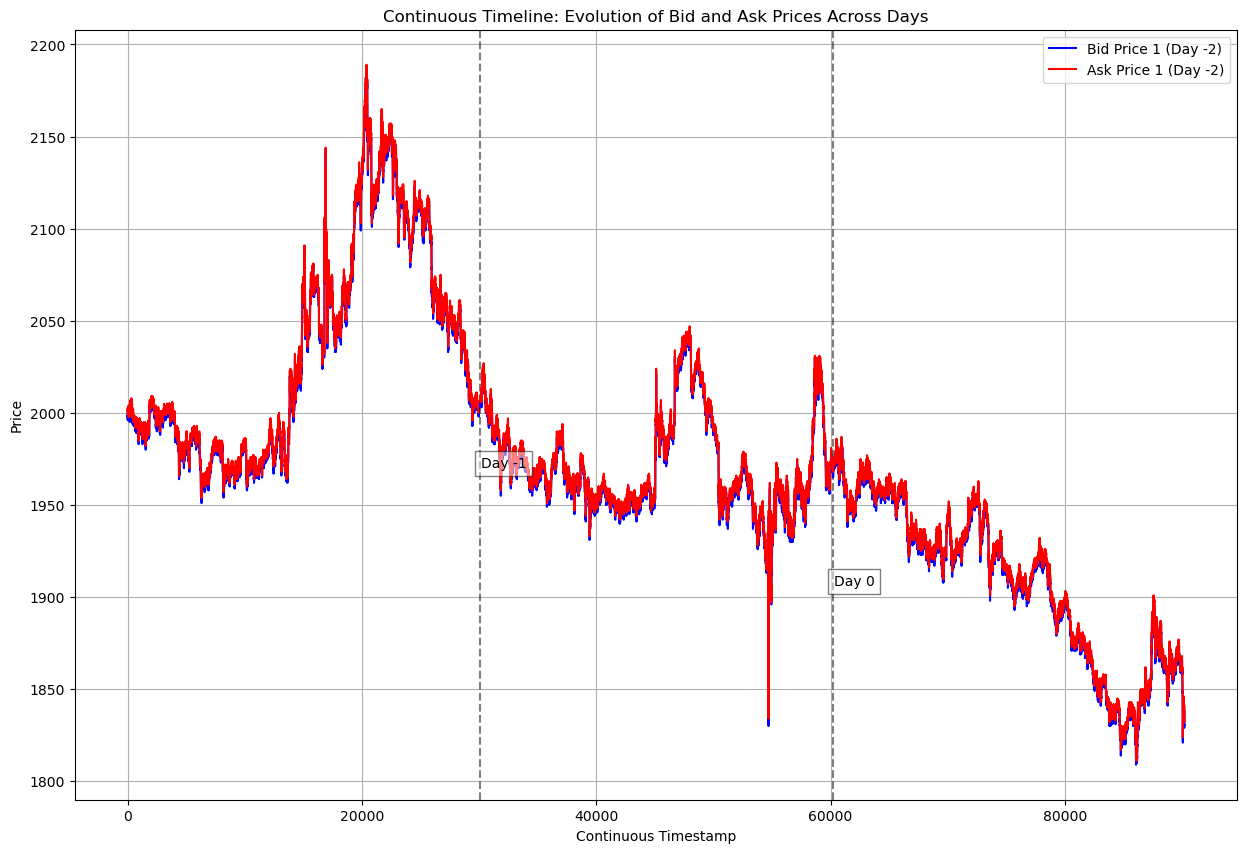

In [20]:
# Plot evolution of prices for all days combined
plt.figure(figsize=(15, 10))

# All days combined
if 'bid_price_1' in all_prices.columns and 'ask_price_1' in all_prices.columns:
    plt.plot(all_prices.index, all_prices['bid_price_1'], 'b-', label='Bid Price 1')
    plt.plot(all_prices.index, all_prices['ask_price_1'], 'r-', label='Ask Price 1')
    if 'bid_price_2' in all_prices.columns and 'ask_price_2' in all_prices.columns:
        plt.plot(all_prices.index, all_prices['bid_price_2'], 'b--', label='Bid Price 2')
        plt.plot(all_prices.index, all_prices['ask_price_2'], 'r--', label='Ask Price 2')
    if 'bid_price_3' in all_prices.columns and 'ask_price_3' in all_prices.columns:
        plt.plot(all_prices.index, all_prices['bid_price_3'], 'b:', label='Bid Price 3')
        plt.plot(all_prices.index, all_prices['ask_price_3'], 'r:', label='Ask Price 3')
    plt.title('All Days: Evolution of Bid and Ask Prices')
    plt.legend()
    plt.grid(True)
    plt.xlabel('Timestamp')
    plt.ylabel('Price')
plt.show()

# Create a continuous timeline plot where days follow each other
plt.figure(figsize=(15, 10))

# Create a new dataframe with continuous timestamps
continuous_data = pd.DataFrame()
timestamp_offset = 0

# Process each day's data in sequence
for day, day_data in [(-2, prices_day__2), (-1, prices_day__1), (0, prices_day_0)]:
    # Create a copy of the data with adjusted timestamps
    day_copy = day_data.copy()
    day_copy.index = day_copy.index + timestamp_offset
    
    # Add a day marker
    if timestamp_offset > 0:
        plt.axvline(x=timestamp_offset, color='k', linestyle='--', alpha=0.5)
        plt.text(timestamp_offset + 50, day_data['bid_price_1'].mean(), f'Day {day}', 
                 bbox=dict(facecolor='white', alpha=0.5))
    
    # Plot this day's data
    if 'bid_price_1' in day_copy.columns and 'ask_price_1' in day_copy.columns:
        plt.plot(day_copy.index, day_copy['bid_price_1'], 'b-', label=f'Bid Price 1 (Day {day})' if timestamp_offset == 0 else "")
        plt.plot(day_copy.index, day_copy['ask_price_1'], 'r-', label=f'Ask Price 1 (Day {day})' if timestamp_offset == 0 else "")
    
    # Update the offset for the next day
    timestamp_offset = max(day_copy.index) + 100  # Add a gap between days

plt.title('Continuous Timeline: Evolution of Bid and Ask Prices Across Days')
plt.legend()
plt.grid(True)
plt.xlabel('Continuous Timestamp')
plt.ylabel('Price')
plt.show()
